In [29]:
import cv2 as cv
import numpy as np
import math

searchWindowSize : is the size of the patch that is used to compare with other patches in the image.


In [ ]:
#image'a border ekleme
img = cv.imread('images/opencv-logo.png')


In [52]:
def w(Vp, Vq, h):
    return math.exp(-1*(np.subtract(Vp, Vq) ** 2).sum()/h**2)

In [56]:
def NLM(image, h, patch_size, search_size):
    img = image.copy()
    a = patch_size//2 #padding için
    img = cv.copyMakeBorder(img,a, a, a, a, cv.BORDER_REFLECT)
    filtered_img = np.zeros(img.shape)
    for i in range(a, img.shape[0]-a):
        for j in range(a, img.shape[1]-a):
            sum = 0 #sum of weights
            Z = 0 #normalization factor
            patch = img[i-a:i+a+1, j-a:j+a+1].flatten() #Vp
            iMin = max(i-search_size, a) #image'da border dışına çıkmamak için
            iMax = min(i+search_size, img.shape[0]-a-1) #image'da border dışına çıkmamak için
            jMin = max(j-search_size, a) #image'da border dışına çıkmamak için      
            jMax = min(j+search_size, img.shape[1]-a-1) #image'da border dışına çıkmamak için
            for k in range(iMin, iMax+1):
                for l in range(jMin, jMax+1):
                    if math.hypot(k - i, l - j) <= search_size and (k != i or l != j):
                        Vq = img[k-a:k+a+1, l-a:l+a+1].flatten()
                        Z+= w(patch, Vq, h)
                        sum += w(patch, Vq, h) * img[k, l]

            filtered_img[i, j] = round(sum/Z)
    return filtered_img[a:img.shape[0]-a, a:img.shape[1]-a]



In [51]:
(np.subtract([1,2,3], [5,5,5]) ** 2).sum()

29

In [48]:
noisyImage_Gaussian = cv.imread('noisyImage_Gaussian.jpg', 0)

In [57]:
test = NLM(noisyImage_Gaussian, 10, 5, 50)

KeyboardInterrupt: 

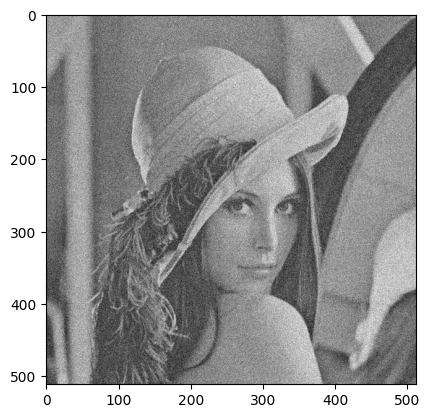

In [7]:
#matplotlib ile noisyImage_Gaussian gösterimi.
import matplotlib.pyplot as plt
plt.imshow(noisyImage_Gaussian, cmap='gray')
plt.show()


In [18]:
temp, temp1 = NLM(noisyImage_Gaussian, 10, 7, 50)

3 28 3 28


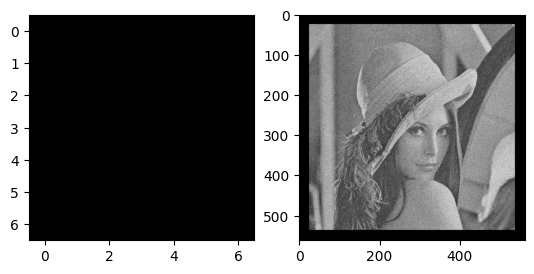

In [16]:
#temp ve temp1 gösterimi yan yana
import matplotlib.pyplot as plt
plt.subplot(121),plt.imshow(temp, cmap='gray')
plt.subplot(122),plt.imshow(temp1, cmap='gray')
plt.show()



